In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import load_experiments

from experiment import experiments_to_df

from analysis import extract_needed

In [2]:
experiments_10, df_10 = load_experiments('../results/experim_10.json')
experiments_11, df_11 = load_experiments('../results/experim_11.json')
experiments_12, df_12 = load_experiments('../results/experim_12.json')

In [3]:
base = experiments_10 + experiments_11 + experiments_12

In [92]:
def draw_several(from_start=True, logs=None, labels=None, colors=None,
                 best_color="black", best_label="Best partition", linestyles=None,
                 title=None, fig_size=(10, 5), loc='upper left', bbox_to_anchor=None, save_path=None):
    if title is None:
        title = "Master total losses for different algorithms"
    shift = 0 if from_start else logs[0].shift

    plt.figure(figsize=fig_size)

    grid = np.arange(logs[0].total_time - shift)

    plt.plot(grid, logs[0].ideal_losses[shift:].cumsum(), label=best_label, color=best_color, linestyle=(8, (15, 3)))
    if linestyles is None:
        linestyles = [None] * 4

    for i, log, label, color in zip(np.arange(len(colors)), logs, labels, colors):
        plt.plot(grid, log.master_losses_all[shift:].cumsum(), label=label, color=color, linestyle=linestyles[i])

    plt.xlabel("Time")
    plt.ylabel("Cumulative loss")

    plt.legend(loc=loc, bbox_to_anchor=bbox_to_anchor)

    bottom, top = plt.gca().get_ybound()
    left, right = plt.gca().get_xbound()
    for gen_idx, gen_stamp in zip(np.r_[logs[0].indexes, -1], logs[0].stamps):
        if gen_stamp < shift:
            continue
        plt.axvline(gen_stamp - shift, color='grey', linestyle=':', lw=1)
        if gen_idx != -1:
            plt.text(x=gen_stamp - shift + 0.005 * (right - left), y=top - 0.06 * (top - bottom),
                              s=f"{gen_idx+1}", color='grey', rotation=15)

    plt.title(title, fontsize=15)
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()


def extract_needed(experiments, needed):
    vital = []
    for experiment in experiments:
        take = True
        for key in needed.keys():
            if getattr(experiment, key) not in needed[key]:
                take = False
        if take:
            vital.append(experiment)
    return vital


In [93]:
needed_1 = {
    'random_seed': [104],
    'train_window': [10],
    'key_a': ["default"],
    'key_w': ["default", "simple_101", "const", "diverge_05"]
}

interesting = extract_needed(base, needed_1)

In [94]:
interesting = [interesting[0]] + interesting[2:] + [interesting[1]]

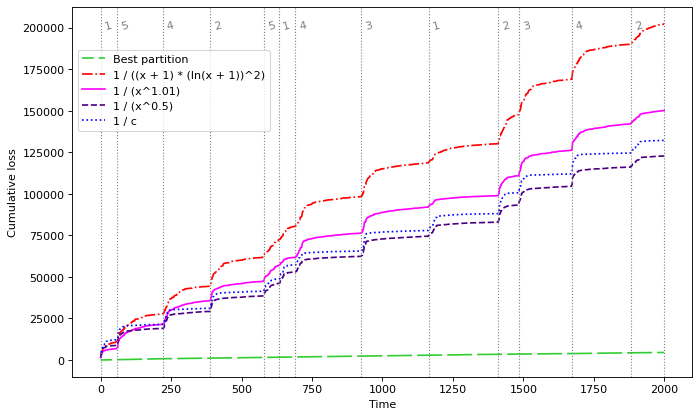

In [101]:
vital = interesting
anls = [experiment.logs for experiment in vital]
labels = [weight_hypers[experiment.key_w].repr for experiment in vital]
colors = ["red", "magenta", "indigo", "blue"]
draw_several(from_start=False, logs=anls, labels=labels, colors=colors, 
             best_color="limegreen", best_label="Best partition", 
             linestyles=["dashdot", "solid", "dashed", "dotted"],
             title="", fig_size=(10, 6), loc='upper left', bbox_to_anchor=(0, 0.9))#, save_path="../../figures/diff_wf_styled.eps")